In [5]:
setwd("/Users/rebecca/sudmant/analyses/myotis/analysis/reciprocal_best_hits/contextualize_best_hits")

library(dplyr, verbose = FALSE)
library(tidyr)
library(scales)
library(ggplot2)
library(data.table)
library(RColorBrewer)

myo_meta <- read.csv("../../../data/myotis_meta.csv")

In [3]:
# for (i in seq_along(myo_meta$Abbr)) {
#   for (j in seq_along(myo_meta$Abbr)) {
#     if (i != j) {
     
#     }
#   }
# }

In [62]:
i = 1
j = 2

peaks1 <- fread(
  file.path("resources/genes/peaks", 
  list.files(path = "resources/genes/peaks", pattern = paste0(myo_meta$Abbr[i], "_vs_", myo_meta$Abbr[j], ".*_peaks.csv"))),
  data.table = FALSE
  )
peaks2 <- fread(
  file.path("resources/genes/peaks", 
  list.files(path = "resources/genes/peaks", pattern = paste0(myo_meta$Abbr[j], "_vs_", myo_meta$Abbr[i], ".*_peaks.csv"))),
  data.table = FALSE
  )

peaks1$Reciprocal_Seq <- with(peaks1, paste(Chr, Reciprocal_Start, Reciprocal_End))
peaks2$Reciprocal_Seq <- with(peaks2, paste(Chr, Reciprocal_Start, Reciprocal_End))
peaks1$Reciprocal_Length <- as.numeric(with(peaks1, Reciprocal_End - Reciprocal_Start))
peaks2$Reciprocal_Length <- as.numeric(with(peaks2, Reciprocal_End - Reciprocal_Start))
peaks1$Peak_Length <- as.numeric(with(peaks1, paste(Peak_End - Peak_Start)))
peaks2$Peak_Length <- as.numeric(with(peaks2, paste(Peak_End - Peak_Start)))

peaks1_df <- peaks1 %>%
  dplyr::group_by(Chr, Reciprocal_Seq) %>% 
  dplyr::summarise(
    No.Peaks = n(),
    No.Peaks_Rel = n()/unique(Reciprocal_Length)
  )

peaks2_df <- peaks2 %>%
  dplyr::group_by(Chr, Reciprocal_Seq) %>% 
  dplyr::summarise(
    No.Peaks = n(),
    No.Peaks_Rel = n()/unique(Reciprocal_Length)
  )

`summarise()` has grouped output by 'Chr'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Chr'. You can override using the `.groups`
argument.


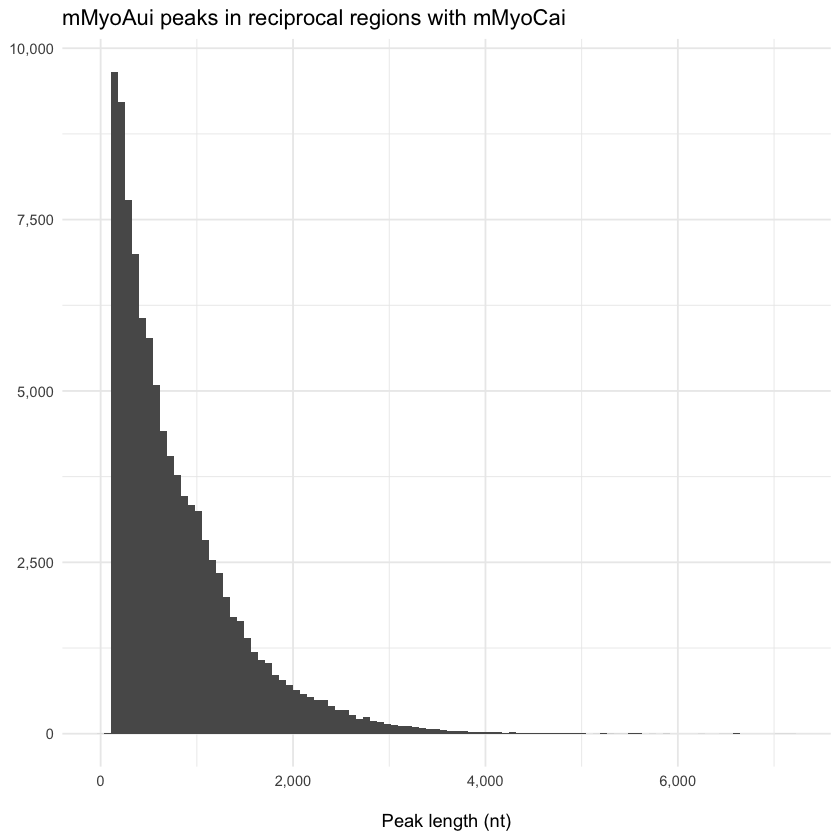

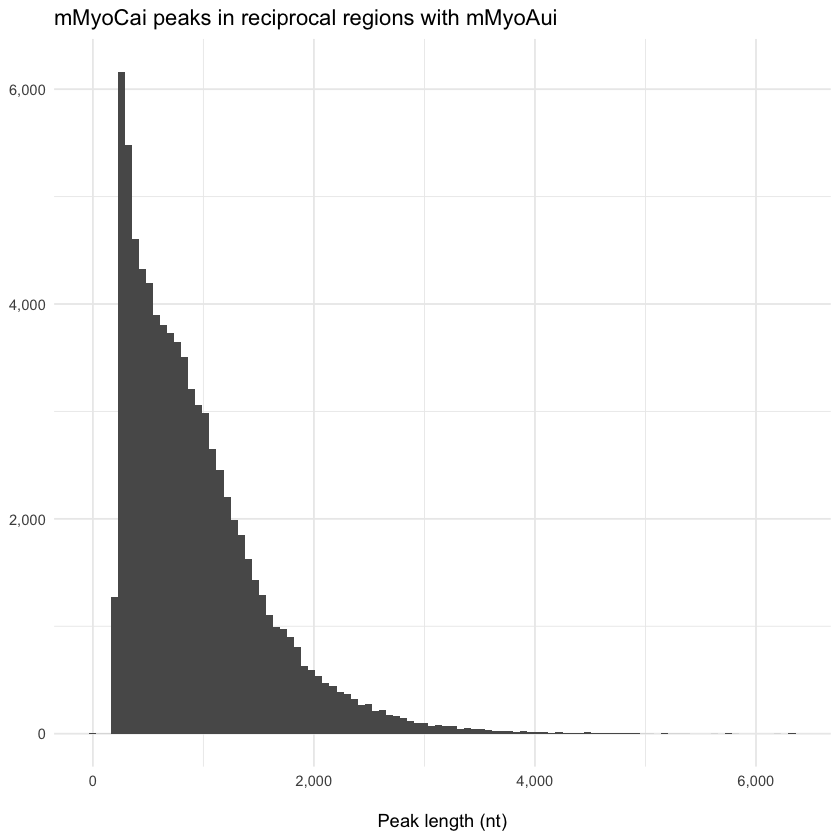

In [59]:
## Plot distro of peak lengths:

print(
  ggplot(peaks1, aes(x = Peak_Length)) + 
  geom_histogram(bins = 100) +
  theme_minimal() +
  theme(axis.title.x = element_text(margin = margin(t = 15)),
        axis.title.y = element_blank()) +
  labs(title = paste(myo_meta$Abbr[i], "peaks in reciprocal regions with", myo_meta$Abbr[j])) +
  xlab("Peak length (nt)") +
  scale_x_continuous(labels = comma) +
  scale_y_continuous(labels = comma)
)

print(
  ggplot(peaks2, aes(x = Peak_Length)) + 
  geom_histogram(bins = 100) +
  theme_minimal() +
  theme(axis.title.x = element_text(margin = margin(t = 15)),
        axis.title.y = element_blank()) +
  labs(title = paste(myo_meta$Abbr[j], "peaks in reciprocal regions with", myo_meta$Abbr[i])) +
  xlab("Peak length (nt)") +
  scale_x_continuous(labels = comma) +
  scale_y_continuous(labels = comma)
)

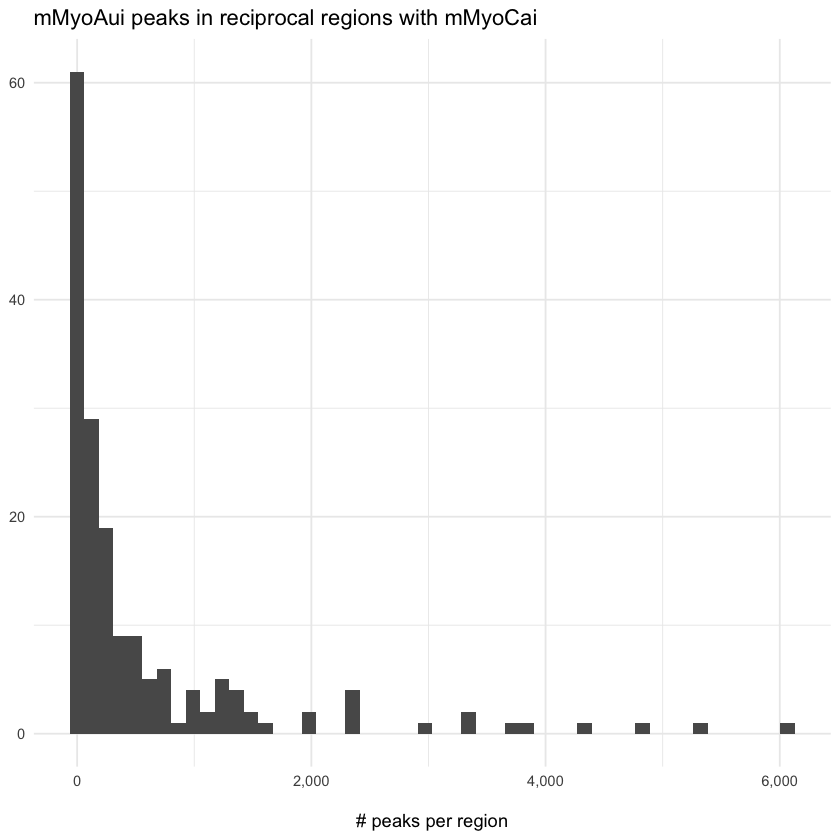

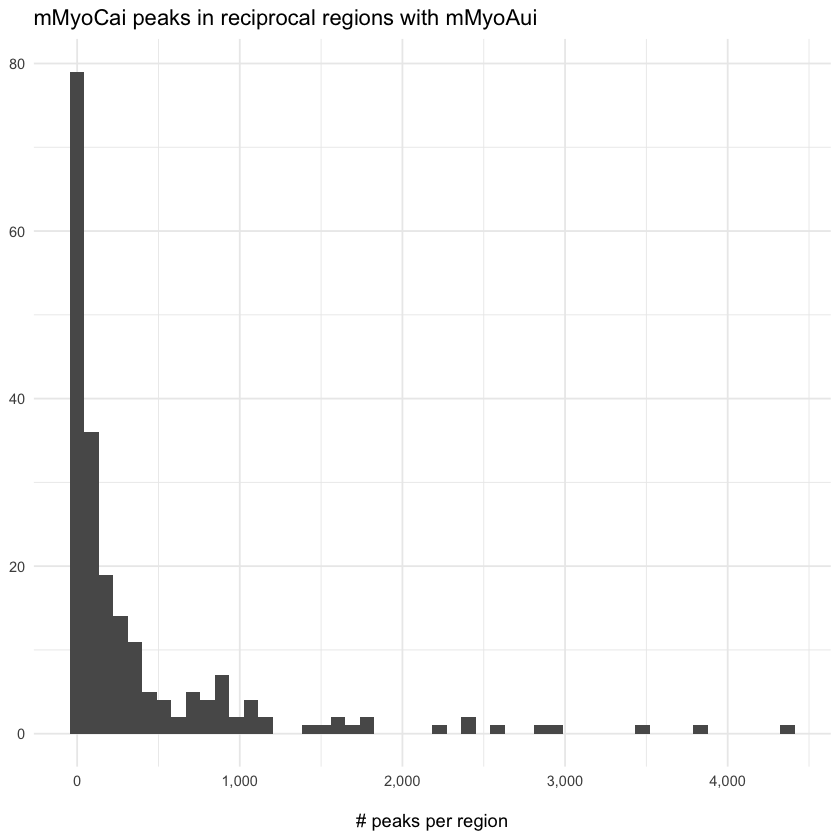

In [60]:
## Plot distro of # of peaks per reciprocal region:

print(
  ggplot(peaks1_df, aes(x = No.Peaks)) + 
    geom_histogram(bins = 50) +
    theme_minimal() +
    theme(axis.title.x = element_text(margin = margin(t = 15)),
          axis.title.y = element_blank()) +
    labs(title = paste(myo_meta$Abbr[i], "peaks in reciprocal regions with", myo_meta$Abbr[j])) +
    xlab("# peaks per region") +
    scale_x_continuous(labels = comma)
)

print(
  ggplot(peaks2_df, aes(x = No.Peaks)) + 
    geom_histogram(bins = 50) +
    theme_minimal() +
    theme(axis.title.x = element_text(margin = margin(t = 15)),
          axis.title.y = element_blank()) +
    labs(title = paste(myo_meta$Abbr[j], "peaks in reciprocal regions with", myo_meta$Abbr[i])) +
    xlab("# peaks per region") +
    scale_x_continuous(labels = comma)
)

# print(
#   ggplot(peaks1_df, aes(No.Peaks_Rel)) +
#     geom_histogram(bins = 30) +
#     theme_minimal() +
#     theme(axis.title.x = element_text(margin = margin(t = 15)),
#           axis.title.y = element_blank()) +
#     labs(title = paste(myo_meta$Abbr[i], "peaks in reciprocal regions with", myo_meta$Abbr[j])) +
#     xlab("# peaks per nucleotide in reciprocal regions") +
#     scale_x_continuous(breaks = seq(0, 1, by = .00005))
# )